In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()

X = iris.data[:, [2, 3]]
y = iris.target

scaler = StandardScaler()
scaler.fit(X, y)
X_std = scaler.transform(X)

X_std_train, X_std_test, y_train, y_test = train_test_split(
    X_std,
    y,
    test_size=0.3,
    random_state=1,
    stratify=y,
)

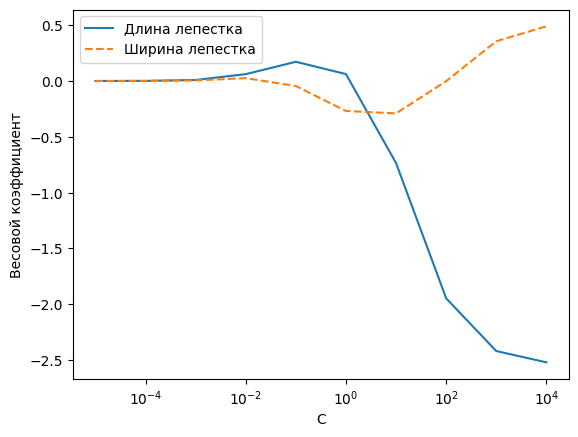

In [3]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c)
    lr.fit(X_std_train, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0], label="Длина лепестка")
plt.plot(params, weights[:, 1], label="Ширина лепестка", linestyle="--")
plt.ylabel("Весовой коэффициент")
plt.xlabel("C")
plt.legend(loc="upper left")
plt.xscale("log")
plt.show()